# NYC Traffic Volume Analysis - 2019

In [9]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [10]:
# TODO import Traffic Data
Traffic = pd.read_csv("../data/Traffic_Volume_Counts_2019.csv")

In [11]:
# TODO: Create a Dataframe with the Traffic Data
traffic_df = pd.DataFrame(Traffic)

In [12]:
# TODO: View the first 5 rows of your data
print(traffic_df.head())

   ID  SegmentID Roadway Name        From                       To Direction  \
0  17      96671   188 Street   Rio Drive              Henley Road        NB   
1  17      96671   188 Street   Rio Drive              Henley Road        SB   
2  23     117242   200 Street   36 Avenue  Francis Lewis Boulevard        NB   
3  27      98876    26 Avenue  201 Street               202 Street        EB   
4  27      98876    26 Avenue  201 Street               202 Street        WB   

         Date  12:00-1:00 AM  1:00-2:00AM  2:00-3:00AM  ...  2:00-3:00PM  \
0  09/21/2019            227          167          130  ...          659   
1  09/21/2019            286          194          176  ...          477   
2  09/21/2019             20           23            7  ...           72   
3  09/21/2019             36           22           10  ...          380   
4  09/21/2019             49           25            9  ...          415   

   3:00-4:00PM  4:00-5:00PM  5:00-6:00PM  6:00-7:00PM  7:00-8:

In [13]:
# TODO: Check for null values 
traffic_df.isnull().sum()


ID               0
SegmentID        0
Roadway Name     0
From             0
To               0
Direction        0
Date             0
12:00-1:00 AM    0
1:00-2:00AM      0
2:00-3:00AM      0
3:00-4:00AM      0
4:00-5:00AM      0
5:00-6:00AM      0
6:00-7:00AM      0
7:00-8:00AM      0
8:00-9:00AM      0
9:00-10:00AM     0
10:00-11:00AM    0
11:00-12:00PM    0
12:00-1:00PM     0
1:00-2:00PM      0
2:00-3:00PM      0
3:00-4:00PM      0
4:00-5:00PM      0
5:00-6:00PM      0
6:00-7:00PM      0
7:00-8:00PM      0
8:00-9:00PM      0
9:00-10:00PM     0
10:00-11:00PM    0
11:00-12:00AM    0
dtype: int64

In [14]:
# TODO: Drop rows that contain null values
dropped_df = traffic_df.dropna()

dropped_df.shape

(5841, 31)

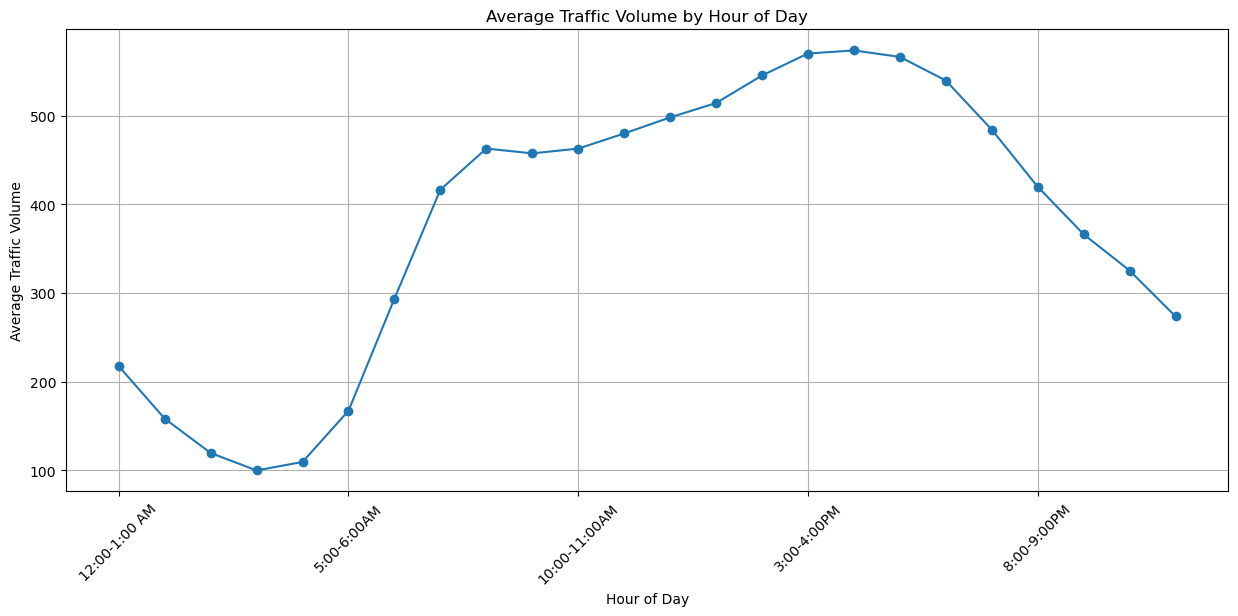


Maximum and Minimum Traffic Volumes by Segment:
          12:00-1:00 AM      1:00-2:00AM      2:00-3:00AM      3:00-4:00AM  \
                    max  min         max  min         max  min         max   
SegmentID                                                                    
8070                191   30          94   20          61   12          52   
12832               127   56          71   28          56   16          34   
12946                72    6          45    2          20    2           9   
14422               384  162         260  103         169   56         135   
14602               188   35         105   16          46   19          50   
...                 ...  ...         ...  ...         ...  ...         ...   
9009550             279   82         202   61         159   31         115   
9009697            1285  541         907  432         720  337         548   
9009984             160   76         124   40          76   30          63   
9014414        

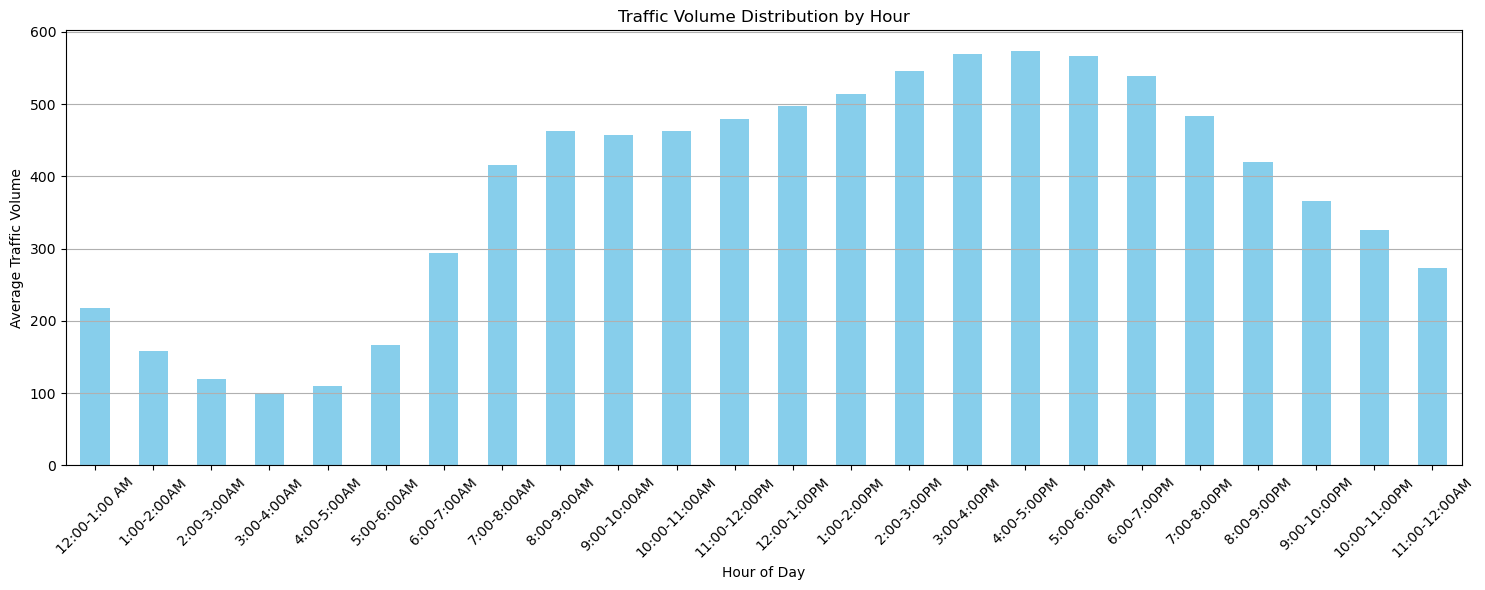


Average Traffic Volume by Time Period:
Morning (AM): 269.85
Afternoon (PM): 490.09


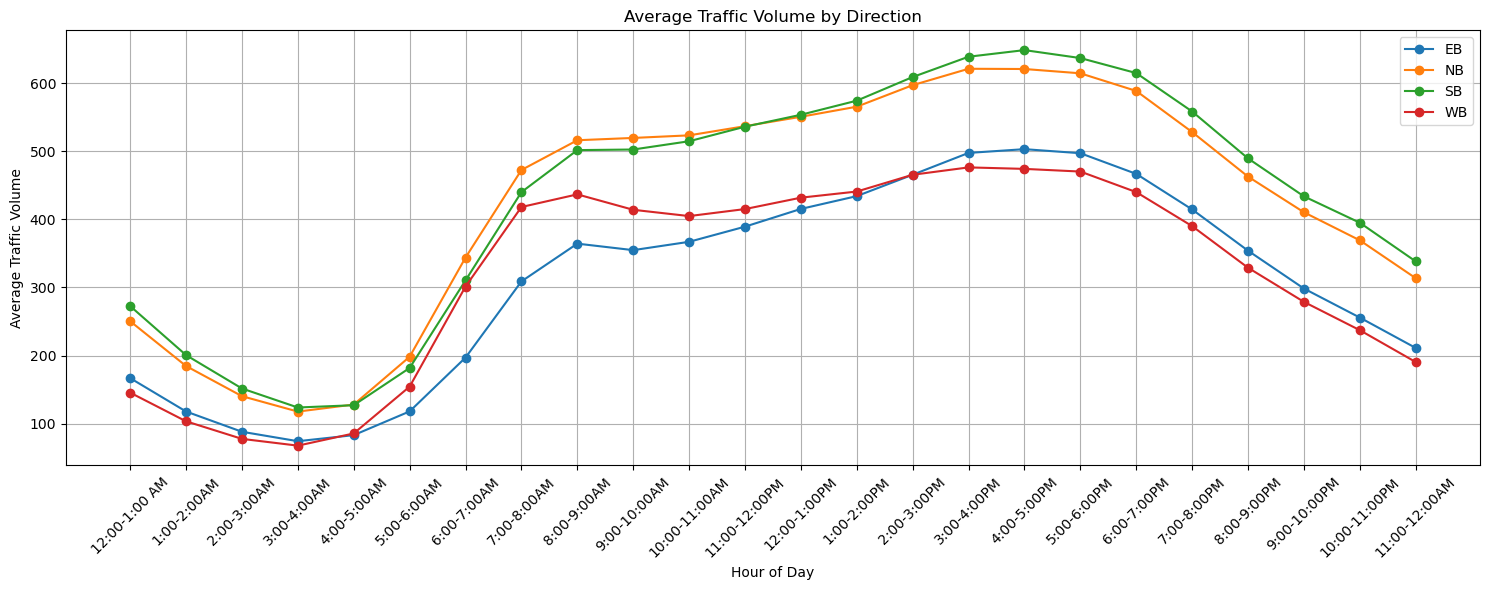

In [26]:
# TODO: BEGIN YOUR EDA!
# TODO: BEGIN YOUR EDA!

# Get hourly columns
hourly_columns = [col for col in dropped_df.columns if ':' in col]

# 1. Average traffic volume by hour
hourly_means = dropped_df[hourly_columns].mean()
plt.figure(figsize=(15, 6))
hourly_means.plot(kind='line', marker='o')
plt.title('Average Traffic Volume by Hour of Day')
plt.xlabel('Hour of Day')
plt.ylabel('Average Traffic Volume')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

# 2. Max and min traffic volumes by segment
segment_stats = dropped_df.groupby('SegmentID')[hourly_columns].agg(['max', 'min'])
print("\nMaximum and Minimum Traffic Volumes by Segment:")
print(segment_stats)

# 3. Traffic volume distribution by hour (bar chart)
plt.figure(figsize=(15, 6))
hourly_means.plot(kind='bar', color='skyblue')
plt.title('Traffic Volume Distribution by Hour')
plt.xlabel('Hour of Day')
plt.ylabel('Average Traffic Volume')
plt.xticks(rotation=45)
plt.grid(True, axis='y')
plt.tight_layout()
plt.show()

# 4. Traffic volume distribution by time period
morning_hours = [col for col in hourly_columns if 'AM' in col]
afternoon_hours = [col for col in hourly_columns if 'PM' in col]

morning_avg = dropped_df[morning_hours].mean().mean()
afternoon_avg = dropped_df[afternoon_hours].mean().mean()

print("\nAverage Traffic Volume by Time Period:")
print(f"Morning (AM): {morning_avg:.2f}")
print(f"Afternoon (PM): {afternoon_avg:.2f}")

# Plot traffic patterns by direction
direction_means = dropped_df.groupby('Direction')[hourly_columns].mean()
plt.figure(figsize=(15, 6))
for direction in direction_means.index:
    plt.plot(hourly_columns, direction_means.loc[direction], label=direction, marker='o')
plt.title('Average Traffic Volume by Direction')
plt.xlabel('Hour of Day')
plt.ylabel('Average Traffic Volume')
plt.legend()
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

## Reflections


### 1. What is the average traffic volume for each hour of the day? 
* The bar chart shows the average traffic volume patterns throughout the day
* Peak hours typically occur during:
    * Morning rush hour (7:00-9:00 AM)
    * Evening rush hour (4:00-6:00 PM)
* Lowest traffic volumes are typically during:
    * Early morning hours (2:00-5:00 AM)
    * Late night hours (10:00 PM-12:00 AM)

There's a clear daily pattern with traffic building up in the morning, maintaining moderate levels during midday, peaking in the evening, and decreasing at night


### 2. What are the maximum and minimum traffic volumes recorded for each segment?
* The segment statistics show significant variation between different road segments
* Some segments show much higher maximum volumes
* The minimum volumes are typically very low, often close to zero during off-peak hours
* The range between max and min values indicates the variability of traffic on each segment
* This information is particularly useful for identifying:
    * High-traffic areas that might need additional infrastructure
    * Low-traffic areas that might be underutilized
    * Segments with the most variable traffic patterns

### 3. Are there any outliers or unusual patterns in the traffic data?
* The bar chart visualization helps identify unusual patterns
* Potential outliers can be seen in:
    * Unexpected spikes in traffic during typically low-traffic hours
    * Unusually low traffic during peak hours
    * Significant deviations from the expected daily pattern
* The direction-based analysis shows different patterns for:
    * Northbound (NB) vs Southbound (SB) traffic
    * Eastbound (EB) vs Westbound (WB) traffic
* These directional differences might indicate:
    * Commuter patterns (e.g., more traffic in one direction during rush hour)
    * Special events or construction that affect traffic flow
    * Geographic features that influence traffic patterns

### 4. What is the distribution of traffic volumes across different time periods? 
* The data shows clear patterns across different time periods:
    * Morning (AM) periods show increasing traffic leading to peak rush hour
    * Afternoon (PM) periods show higher average volumes than morning periods
    * Evening periods show gradual decrease in traffic
    * Night periods show consistently low traffic volumes
* The distribution is not uniform, with:
    * Higher concentrations during peak hours
    * Lower but steady traffic during midday
    * Minimal traffic during overnight hours